In [43]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import string
from matplotlib import gridspec

import time
import pickle

import memory_profiler

%load_ext memory_profiler

from pathlib import Path

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [44]:
mpl.__version__

'3.5.1'

In [45]:
import black
import jupyter_black

jupyter_black.load(line_length=79)

In [46]:
%load_ext autoreload
%autoreload 2

from pubmed_landscape_src.plotting import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
variables_path = Path("../../results/variables")
figures_path = Path("../../results/figures")
berenslab_data_path = Path("/gpfs01/berens/data/data/pubmed_processed")

In [48]:
plt.style.use("../matplotlib_style.txt")

# Fig 5: Gender

## Import

In [49]:
tsne_reparsed = np.load(variables_path / "tsne_reparsed.npy")

In [50]:
tsne = np.vstack((-tsne_reparsed[:, 0], tsne_reparsed[:, 1])).T

In [51]:
# load
# legend colors
pickle_in = open(variables_path / "colors_new_legend.pkl", "rb")
colors_new_legend = pickle.load(pickle_in)

colors_new = np.load(variables_path / "colors_new.npy", allow_pickle=True)

In [52]:
colors_gender_first_author = np.load(
    variables_path / "colors_gender_first_author.npy", allow_pickle=True
)

In [53]:
colors_gender_last_author = np.load(
    variables_path / "colors_gender_last_author.npy", allow_pickle=True
)

In [54]:
XX_first = np.load(
    variables_path / "XX_gam_fraction_female_first_author_1960.npy"
)
pdep_first = np.load(
    variables_path / "pdep_gam_fraction_female_first_author_1960.npy"
)
confi_first = np.load(
    variables_path / "confi_gam_fraction_female_first_author_1960.npy"
)
intercept_first = np.load(
    variables_path / "intercept_gam_fraction_female_first_author_1960.npy"
)

In [55]:
XX_last = np.load(
    variables_path / "XX_gam_fraction_female_last_author_1960.npy"
)
pdep_last = np.load(
    variables_path / "pdep_gam_fraction_female_last_author_1960.npy"
)
confi_last = np.load(
    variables_path / "confi_gam_fraction_female_last_author_1960.npy"
)
intercept_last = np.load(
    variables_path / "intercept_gam_fraction_female_last_author_1960.npy"
)

In [56]:
average_fraction_female_first_author = np.load(
    variables_path / "average_fraction_female_first_author.npy"
)
average_fraction_female_last_author = np.load(
    variables_path / "average_fraction_female_last_author.npy"
)

X_years_first_author = np.load(variables_path / "X_years_first_author.npy")
X_years_last_author = np.load(variables_path / "X_years_last_author.npy")

In [57]:
# load
gam_plotting_results = pd.read_pickle(
    variables_path / "gam_fraction_female_labels_plotting_results"
)

In [58]:
gam_plotting_results_T = gam_plotting_results.transpose()

In [59]:
pickle_in = open(variables_path / "X_years_fraction_female_labels.pkl", "rb")
X_years_labels = pickle.load(pickle_in)

pickle_in = open(variables_path / "average_fraction_female_labels.pkl", "rb")
average_fraction_female_labels = pickle.load(pickle_in)

## Plots

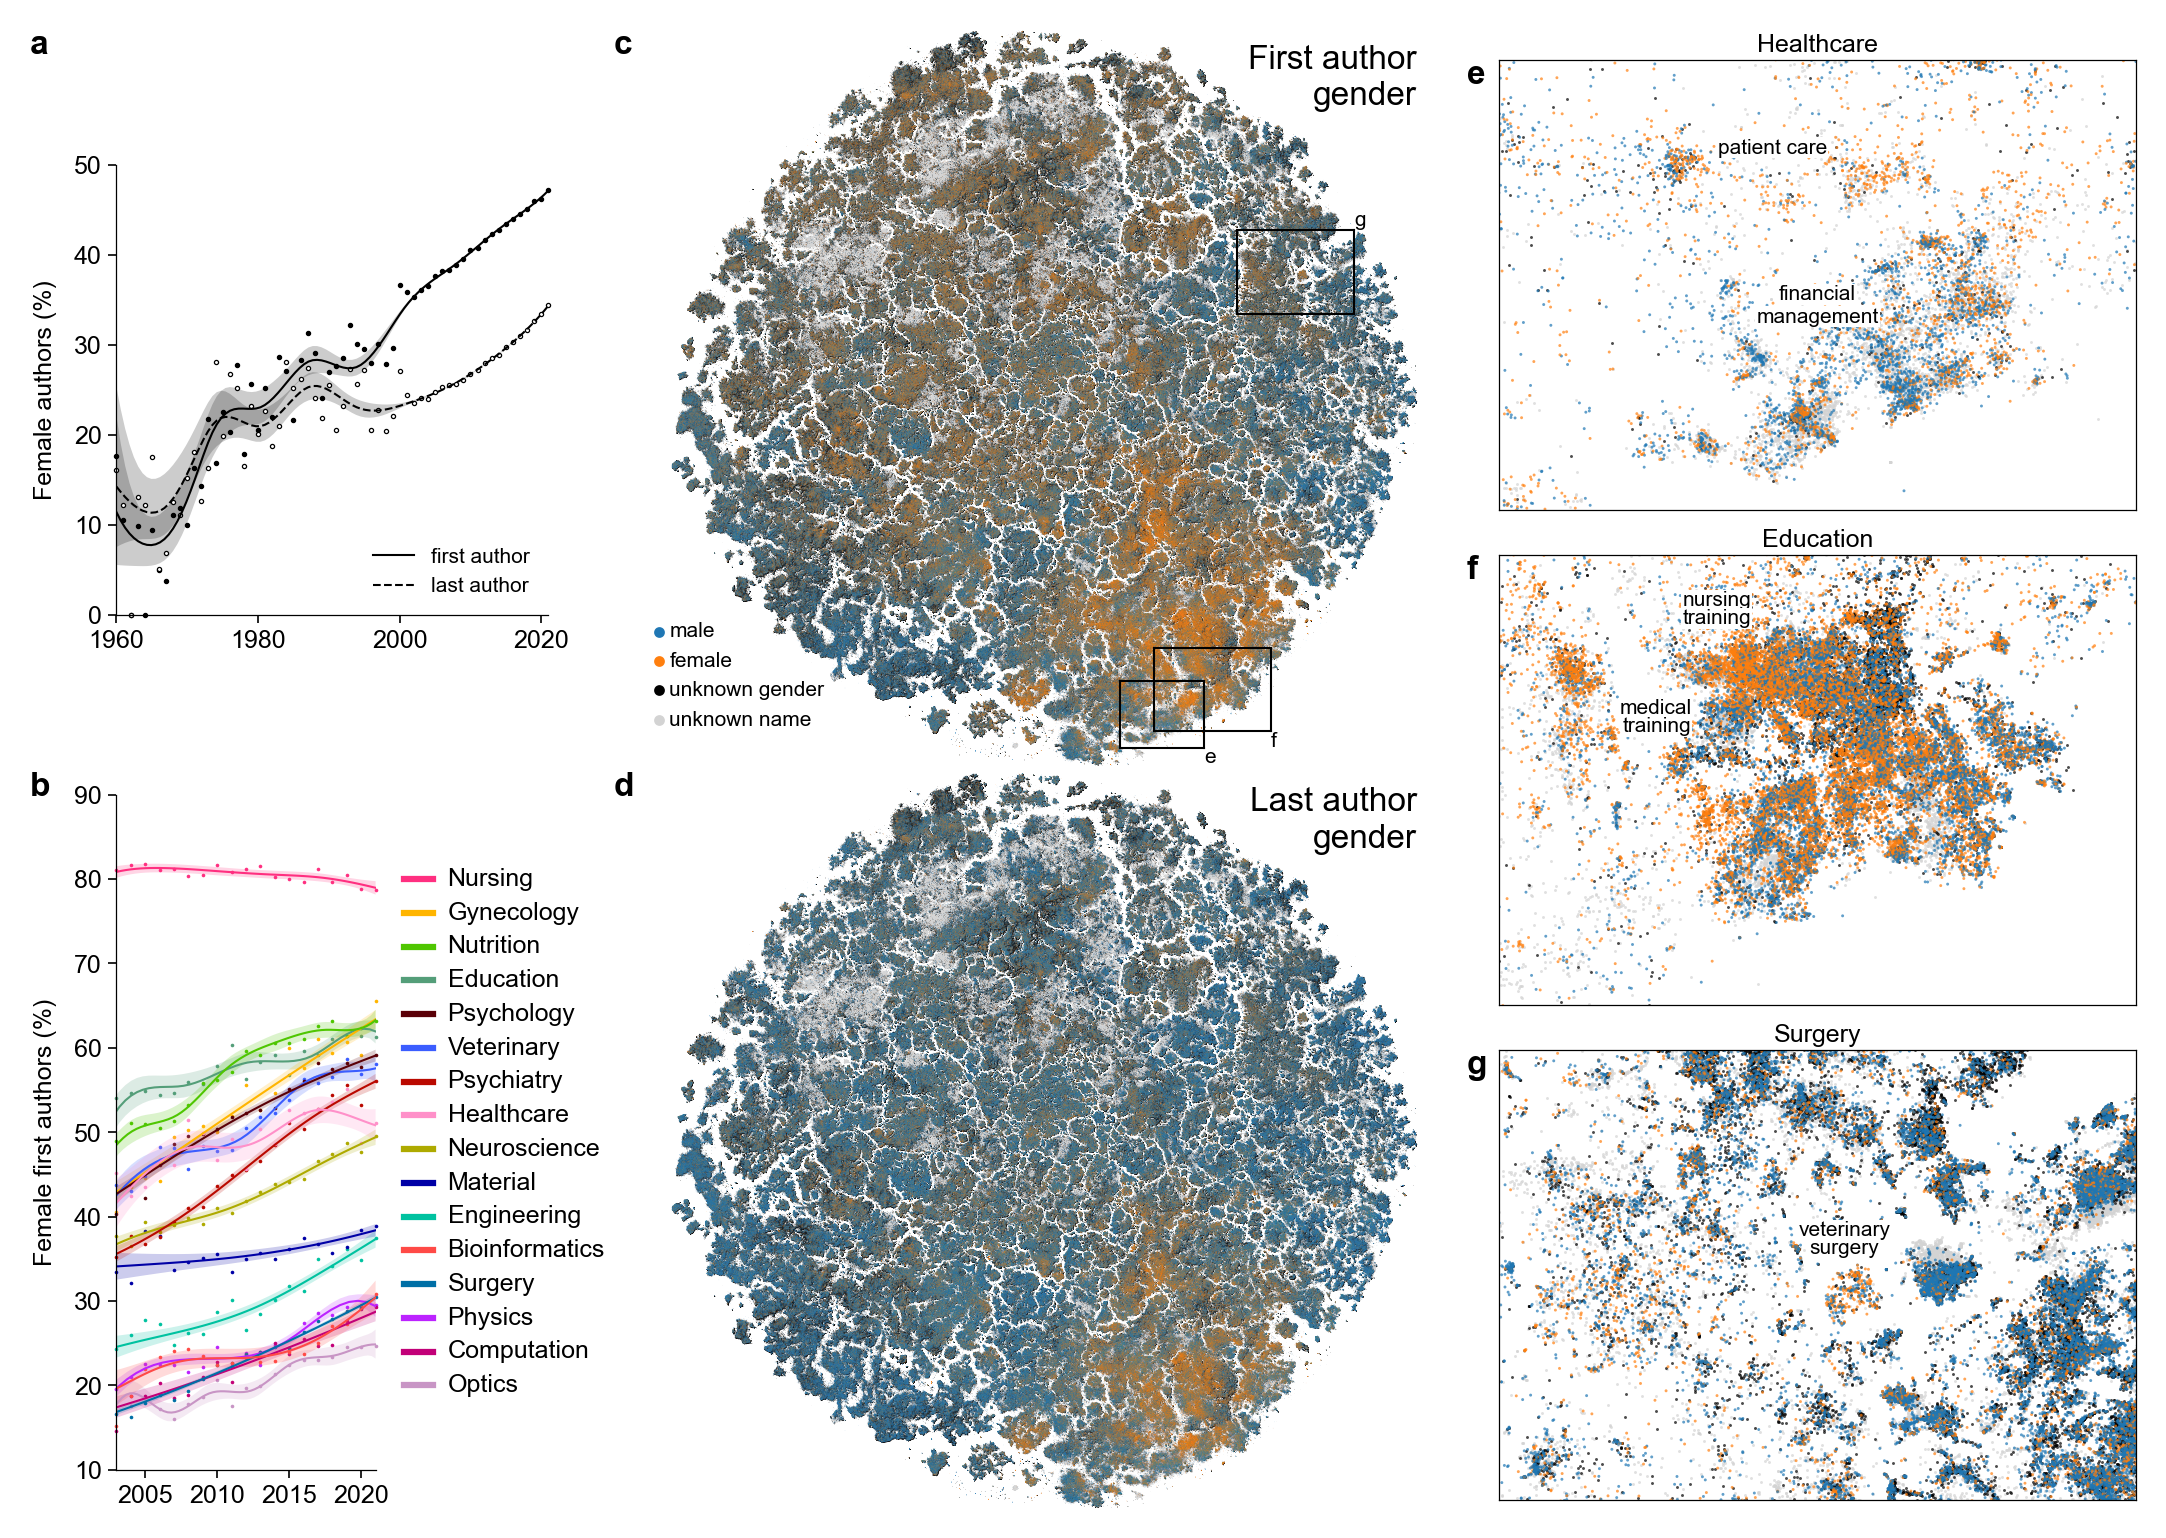

In [65]:
%matplotlib inline
fig = plt.figure(figsize=(7.2, 5), dpi=300)

txtkwargs = dict(size=8, weight="bold", va="top", ha="left")

mpl.rcParams["figure.constrained_layout.use"] = False
mpl.rcParams["figure.autolayout"] = False


# SUBPLOT a
ax0 = fig.add_axes([0.27, 0.5, 0.4, 0.49])  # left, bottom, width, height
x_lim = (-220, 220)
y_lim = (-220, 220)
plot_tsne_genders(
    tsne,
    colors_gender_first_author,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=ax0,
    plot_type="subplot_3",
    legend=True,
)
ax0.text(
    0.93,
    0.98,
    "First author",
    fontsize=8,
    transform=ax0.transAxes,
    va="top",
    ha="right",
)
ax0.text(
    0.93,
    0.93,
    "gender",
    fontsize=8,
    transform=ax0.transAxes,
    va="top",
    ha="right",
)
## square c
x_lim = (45, 95)
y_lim = (-210, -170)
plot_square([y_lim[1], y_lim[0], x_lim[0], x_lim[1]], lw=0.5, c="k")
ax0.text(x_lim[1], y_lim[0], "e", ha="left", va="top", fontsize=5)
##square d
x_lim = (65, 135)
y_lim = (-200, -150)
plot_square([y_lim[1], y_lim[0], x_lim[0], x_lim[1]], lw=0.5, c="k")
ax0.text(x_lim[1], y_lim[0], "f", ha="left", va="top", fontsize=5)
##square e
x_lim = (115, 185)
y_lim = (50, 100)
plot_square([y_lim[1], y_lim[0], x_lim[0], x_lim[1]], lw=0.5, c="k")
ax0.text(x_lim[1], y_lim[1], "g", ha="left", va="bottom", fontsize=5)
ax0.text(0, 1, string.ascii_lowercase[2], transform=ax0.transAxes, **txtkwargs)


# SUBPLOT b
ax1 = fig.add_axes([0.27, 0.005, 0.4, 0.49])
x_lim = (-220, 220)
y_lim = (-220, 220)
plot_tsne_genders(
    tsne,
    colors_gender_last_author,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=ax1,
    plot_type="subplot_3",
    legend=False,
)
ax1.text(
    0.93,
    0.98,
    "Last author",
    fontsize=8,
    transform=ax1.transAxes,
    va="top",
    ha="right",
)
ax1.text(
    0.93,
    0.93,
    "gender",
    fontsize=8,
    transform=ax1.transAxes,
    va="top",
    ha="right",
)
ax1.text(0, 1, string.ascii_lowercase[3], transform=ax1.transAxes, **txtkwargs)


# SUBPLOT c
mpl.rcParams["axes.spines.right"] = True
mpl.rcParams["axes.spines.top"] = True
ax4 = fig.add_axes([0.68, 0.67, 0.295, 0.3])
plot_tsne_genders(
    tsne[colors_new == colors_new_legend["healthcare"]],
    colors_gender_first_author[colors_new == colors_new_legend["healthcare"]],
    x_lim=(40, 90),
    y_lim=(-210, -170),
    ax=ax4,
    plot_type="subregion",
    legend=False,
    axis_on=True,
)

ax4.text(
    65,
    -190,
    "financial",
    ha="center",
    va="top",
    fontsize=5,
    bbox=dict(
        facecolor="white",
        edgecolor="None",
        alpha=1,
        boxstyle="square",
        pad=0.05,
    ),
)
ax4.text(
    65,
    -192,
    "management",
    ha="center",
    va="top",
    fontsize=5,
    bbox=dict(
        facecolor="white",
        edgecolor="None",
        alpha=1,
        boxstyle="square",
        pad=0.05,
    ),
)
ax4.text(
    61,
    -177,
    "patient care",
    ha="center",
    va="top",
    fontsize=5,
    bbox=dict(
        facecolor="white",
        edgecolor="None",
        alpha=1,
        boxstyle="square",
        pad=0.05,
    ),
)

ax4.text(
    -0.05, 1, string.ascii_lowercase[4], transform=ax4.transAxes, **txtkwargs
)
ax4.set_title("Healthcare", fontsize=6, y=0.99)
ax4.set_xticks([])
ax4.set_yticks([])


# SUBPLOT d
ax5 = fig.add_axes([0.68, 0.34, 0.295, 0.3])
plot_tsne_genders(
    tsne[colors_new == colors_new_legend["education"]],
    colors_gender_first_author[colors_new == colors_new_legend["education"]],
    x_lim=(70, 130),
    y_lim=(-200, -150),
    ax=ax5,
    plot_type="subregion",
    legend=False,
    axis_on=True,
)
ax5.text(
    86,
    -166,
    "medical",
    ha="right",
    va="top",
    fontsize=5,
    bbox=dict(
        facecolor="white",
        edgecolor="None",
        alpha=1,
        boxstyle="square",
        pad=0.05,
    ),
)
ax5.text(
    86,
    -168,
    "training",
    ha="right",
    va="top",
    fontsize=5,
    bbox=dict(
        facecolor="white",
        edgecolor="None",
        alpha=1,
        boxstyle="square",
        pad=0.05,
    ),
)
ax5.text(
    85,
    -154,
    "nursing",
    ha="left",
    va="top",
    fontsize=5,
    bbox=dict(
        facecolor="white",
        edgecolor="None",
        alpha=1,
        boxstyle="square",
        pad=0.05,
    ),
)
ax5.text(
    85,
    -156,
    "training",
    ha="left",
    va="top",
    fontsize=5,
    bbox=dict(
        facecolor="white",
        edgecolor="None",
        alpha=1,
        boxstyle="square",
        pad=0.05,
    ),
)
ax5.text(
    -0.05, 1, string.ascii_lowercase[5], transform=ax5.transAxes, **txtkwargs
)
ax5.set_title("Education", fontsize=6, y=0.99)
ax5.set_xticks([])
ax5.set_yticks([])


# SUBPLOT e
ax6 = fig.add_axes([0.68, 0.01, 0.295, 0.3])
plot_tsne_genders(
    tsne[colors_new == colors_new_legend["surgery"]],
    colors_gender_first_author[colors_new == colors_new_legend["surgery"]],
    x_lim=(125, 175),
    y_lim=(50, 100),
    ax=ax6,
    plot_type="subregion",
    legend=False,
    axis_on=True,
)
ax6.text(
    153,
    81,
    "veterinary",
    ha="center",
    va="top",
    fontsize=5,
    bbox=dict(
        facecolor="white",
        edgecolor="None",
        alpha=1,
        boxstyle="square",
        pad=0.05,
    ),
)
ax6.text(
    153,
    79,
    "surgery",
    ha="center",
    va="top",
    fontsize=5,
    bbox=dict(
        facecolor="white",
        edgecolor="None",
        alpha=1,
        boxstyle="square",
        pad=0.05,
    ),
)
ax6.text(
    -0.05, 1, string.ascii_lowercase[6], transform=ax6.transAxes, **txtkwargs
)
ax6.set_title("Surgery", fontsize=6, y=0.99)
ax6.set_xticks([])
ax6.set_yticks([])

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False


# SUBPLOT f
ax2 = fig.add_axes([0.04, 0.6, 0.2, 0.3])  # left, bottom, width, height
ax2.plot(
    XX_first[:, 0],
    pdep_first * 100,
    color="k",
    linestyle="-",
    label="first author",
)
ax2.fill_between(
    XX_first[:, 0],
    confi_first[:, 1] * 100,
    confi_first[:, 0] * 100,
    color="k",
    alpha=0.2,
    edgecolor=None,
)
ax2.scatter(
    np.unique(X_years_first_author),
    average_fraction_female_first_author * 100,
    c="k",
    marker="o",
    s=1,
    edgecolor="k",
    linewidth=0.3,
    clip_on=False,
)

ax2.plot(
    XX_last[:, 0],
    pdep_last * 100,
    color="k",
    linestyle="--",
    label="last author",
)
ax2.fill_between(
    XX_last[:, 0],
    confi_last[:, 1] * 100,
    confi_last[:, 0] * 100,
    color="k",
    alpha=0.2,
    edgecolor=None,
)
ax2.scatter(
    np.unique(X_years_last_author),
    average_fraction_female_last_author * 100,
    c="white",
    marker="o",
    s=1,
    edgecolor="k",
    linewidth=0.3,
    clip_on=False,
)

ax2.legend(loc="lower right", fontsize=5, frameon=False)
ax2.set_xlim(left=1960, right=2021)
ax2.set_ylim(bottom=0, top=50)
ax2.set_ylabel("Female authors (%)", fontsize=6)
ax2_letter = fig.add_axes([0, 0.5, 0.2, 0.49])
ax2_letter.text(
    0,
    1,  # 0.87,
    string.ascii_lowercase[0],
    transform=ax2_letter.transAxes,
    **txtkwargs
)
ax2_letter.axis("off")


# SUBPLOT g
ax3 = fig.add_axes([0.04, 0.03, 0.12, 0.45])
labels = [
    "nursing",
    "education",
    "gynecology",
    "nutrition",
    "veterinary",
    "optics",
    "physics",
    "computation",
    "surgery",
    "engineering",
    "material",
    "neuroscience",
    "psychology",
    "psychiatry",
    "bioinformatics",
    "healthcare",
]
last_point_labels = []

for label in labels:
    ax3.plot(
        gam_plotting_results_T.XX[label][:, 0],
        (gam_plotting_results_T.pdep[label]) * 100,
        c=colors_new_legend[label],
    )

    ax3.fill_between(
        gam_plotting_results_T.XX[label][:, 0],
        (gam_plotting_results_T.confi[label])[:, 1] * 100,
        (gam_plotting_results_T.confi[label])[:, 0] * 100,
        color=colors_new_legend[label],
        alpha=0.2,
        edgecolor=None,
    )
    years_x = np.unique(X_years_labels[label])
    ax3.scatter(
        years_x[years_x >= 2003],
        average_fraction_female_labels[label][years_x >= 2003] * 100,
        c=colors_new_legend[label],
        marker=".",
        s=3,
        clip_on=False,
        lw=0,
    )

    last_point_labels.append(average_fraction_female_labels[label][-1])

last_point_labels = np.hstack(last_point_labels)

## plot legend
sorted_indeces = np.flip(np.argsort(last_point_labels))
sorted_labels = np.array(labels)[sorted_indeces]

x = 2026 * np.ones(len(sorted_labels))
y = np.linspace(80, 20, len(sorted_labels))

for i, label in enumerate(sorted_labels):
    colr = colors_new_legend[label]
    ax3.plot(
        [2023, 2025],
        [y[i], y[i]],
        "-",
        ms=3,
        linewidth=1.5,
        c=colr,
        clip_on=False,
    )
    ax3.text(x[i], y[i], label.capitalize(), fontsize=6, va="center")

ax3.set_ylabel("Female first authors (%)", fontsize=6)
ax3.set_xticks(
    [2005, 2010, 2015, 2020], labels=[2005, 2010, 2015, 2020], fontsize=6
)
ax3.set_xlim(left=2003, right=2021)
ax3.set_ylim(10, 90)
ax3_letter = fig.add_axes([0, 0.005, 0.2, 0.49])
ax3_letter.text(
    0,
    1,
    string.ascii_lowercase[1],
    transform=ax3_letter.transAxes,
    **txtkwargs
)
ax3_letter.axis("off")


fig.savefig(figures_path / "fig_5_genders.png", dpi=300)
fig.savefig(figures_path / "fig_5_genders.pdf", dpi=300)